In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model('../models/fruitNet/resnet_model.h5')

In [12]:
import pathlib
test_dir = "../data/fruitNet/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    seed=123,
    image_size=(224, 224),
)

Found 15 files belonging to 1 classes.


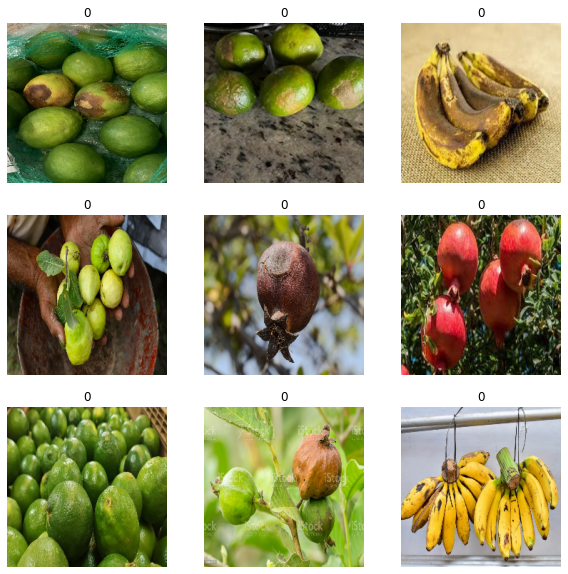

In [13]:
# visualize the data

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [14]:
preprocessing_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [18]:
testGen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocessing_input)

In [24]:
test_ds =testGen.flow_from_directory(test_dir, 
                                        class_mode='categorical', 
                                        batch_size=32,
                                        target_size=(224, 224), 
                                        shuffle=False)

Found 15 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

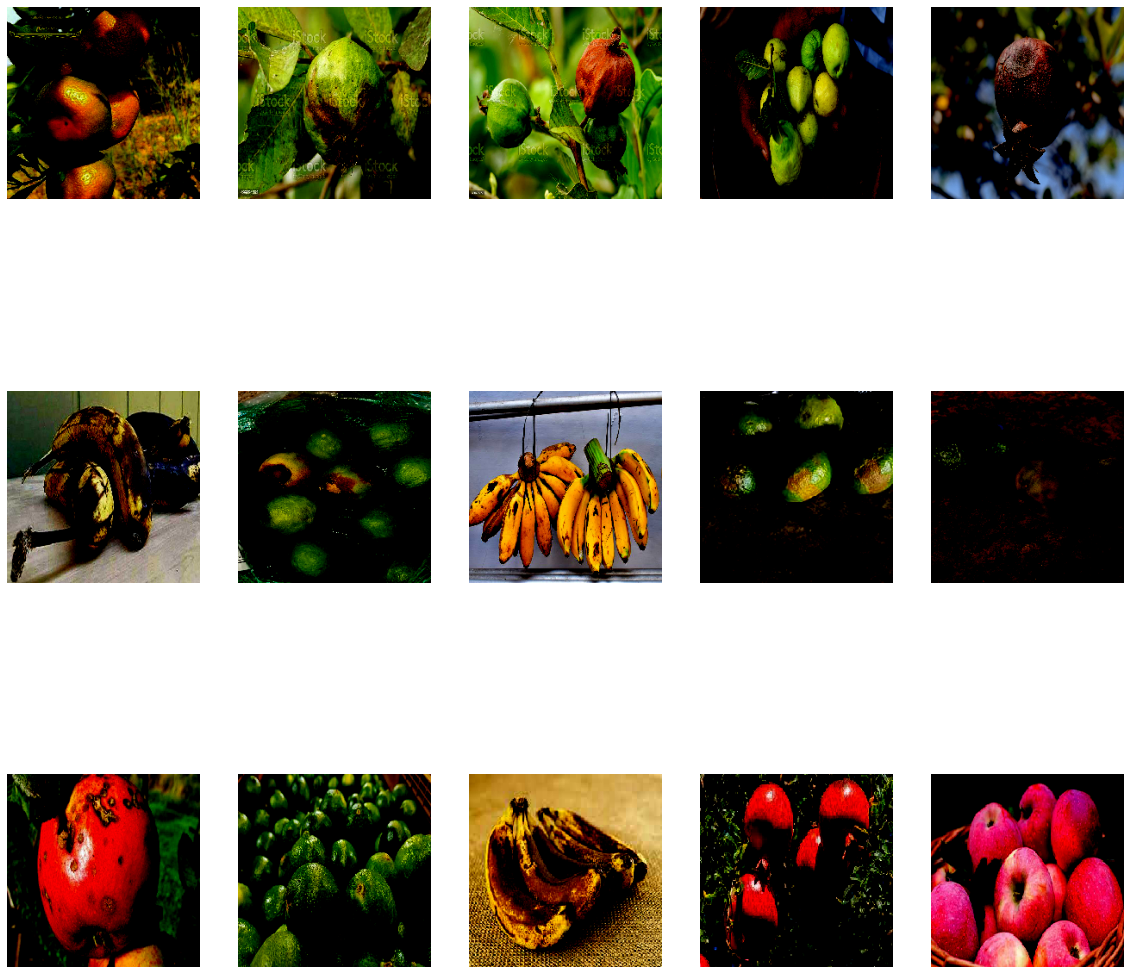

In [29]:
# visualization test_ds
fit, ax = plt.subplots(3, 5, figsize=(20, 20))
ax = ax.flatten()

for i in range(15):
    img = test_ds[0][0][i]
    ax[i].imshow(img)
    ax[i].axis('off')

In [30]:
label_file = open("../models/fruitNet/labels.txt", "r")

labels = label_file.read().splitlines()

In [36]:
sorted_labels = sorted(labels)
sorted_labels

['Apple_Bad',
 'Apple_Good',
 'Apple_mixed',
 'Banana_Bad',
 'Banana_Good',
 'Banana_mixed',
 'Guava_Bad',
 'Guava_Good',
 'Guava_mixed',
 'Lemon_mixed',
 'Lime_Bad',
 'Lime_Good',
 'Orange_Bad',
 'Orange_Good',
 'Orange_mixed',
 'Pomegranate_Bad',
 'Pomegranate_Good',
 'Pomegranate_mixed']

In [31]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 8s 8s/step - loss: 0.8001 - accuracy: 1.0000
Restored model, accuracy: 100.00%


In [43]:
predictions = model.predict(test_ds)
predictions

1/1 [==============================] - 3s 3s/step


array([[0.3115803 , 0.4463877 , 0.24203199],
       [0.33712992, 0.41689956, 0.24597049],
       [0.3074262 , 0.43859547, 0.25397822],
       [0.29736537, 0.46300188, 0.23963274],
       [0.31951517, 0.460517  , 0.21996787],
       [0.28182057, 0.5060587 , 0.21212073],
       [0.33280593, 0.41929287, 0.24790119],
       [0.31771037, 0.4860824 , 0.19620724],
       [0.32287258, 0.42849538, 0.24863206],
       [0.34551537, 0.41644412, 0.2380405 ],
       [0.3538457 , 0.40362015, 0.24253415],
       [0.32841864, 0.4238453 , 0.24773607],
       [0.2952669 , 0.48229906, 0.22243415],
       [0.2885348 , 0.46291548, 0.24854974],
       [0.2817389 , 0.50127596, 0.21698505]], dtype=float32)

In [42]:
pred = np.argmax(predictions, axis=1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
for i in predictions:
    print(sorted_labels[np.argmax(i, axis=1)])
    

AxisError: axis 1 is out of bounds for array of dimension 1

In [37]:
predictions

array([[7.1485481e-38, 1.2287173e-34, 1.0410439e-23, ..., 4.2529397e-16,
        1.5285856e-12, 3.7682407e-16],
       [2.1130465e-30, 3.9724390e-28, 2.2035627e-11, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.7069721e-24,
        2.0236217e-12, 2.6139308e-12],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0867173e-22,
        4.0243402e-22, 1.7694555e-21],
       [3.5834351e-36, 4.5642696e-34, 1.6989235e-22, ..., 1.8250258e-12,
        7.3966473e-13, 2.1230976e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.1355529e-32,
        1.3828476e-15, 1.3540528e-24]], dtype=float32)

In [32]:
len(labels)

3600

In [39]:
# prediction one image

image_path = "../data/date-exp/shyntesis-data/tests/1.jpg"

img = keras.preprocessing.image.load_img(image_path, target_size=(160, 160))

img_arr = np.expand_dims(img, 0)
img_arr = tf.keras.applications.inception_resnet_v2.preprocess_input(img_arr)
pred = model.predict(img_arr)
# score = tf.nn.softmax(pred[0])
pred = np.argmax(pred, axis=1)
print(f"prediction: {labels[pred], 100 * np.max(pred)}")
plt.imshow(img)

1/1 [==============================] - 0s 344ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

1/1 [==============================] - 0s 305ms/step


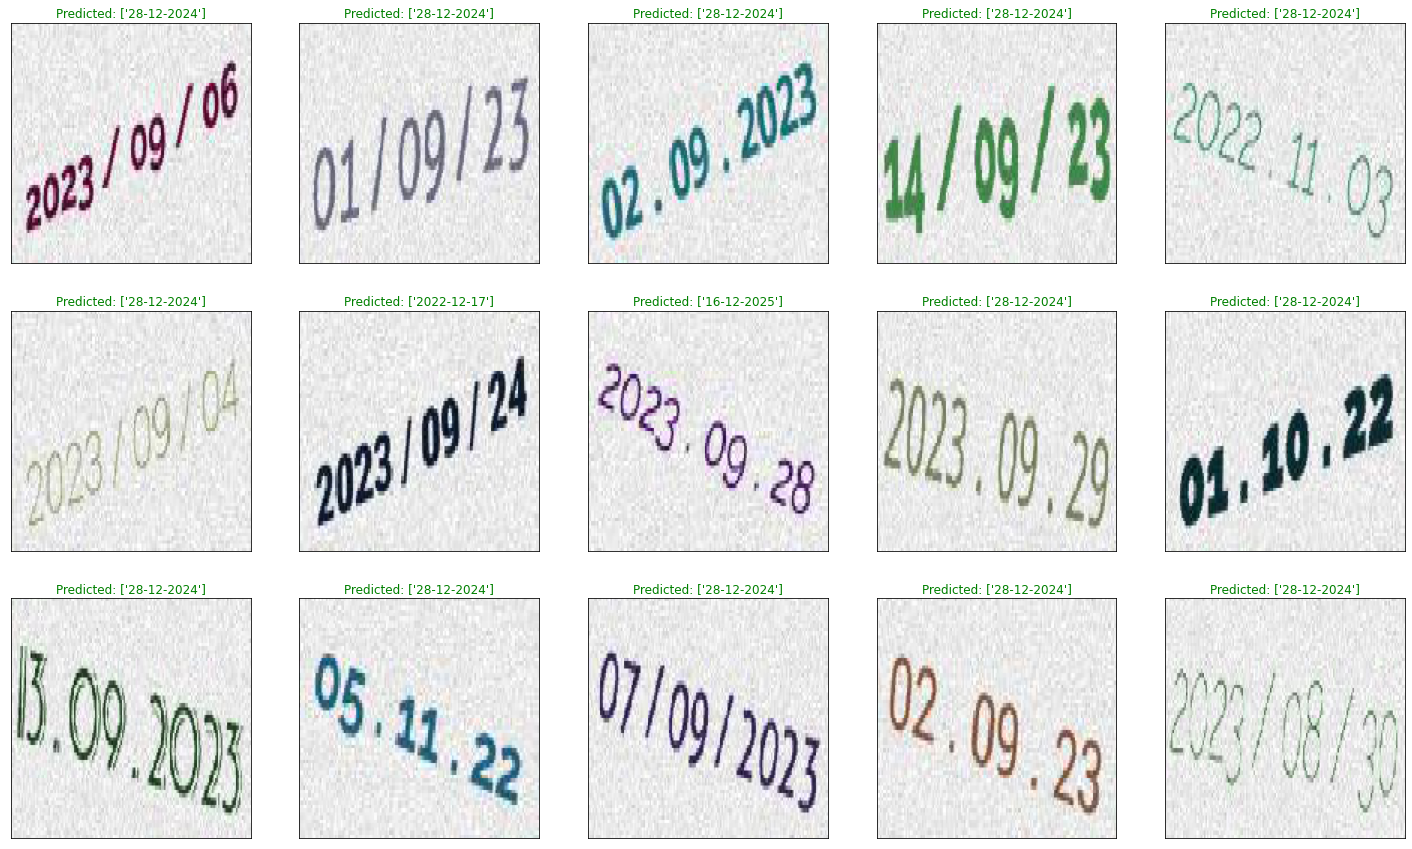

In [40]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

random_index = np.random.randint(1, 10,11)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = load_img(test_dir+"tests/"+str(i+1)+'.jpg', target_size=(160, 160))
    ax.imshow(img)
    img = image.img_to_array(img)
    img_arr = np.expand_dims(img, 0)
    img_arr = preprocessing_input(img_arr)
    pred = model.predict(img_arr)
    
    pred = np.argmax(pred,axis=1)

    # Map the label
    # labels = (train_dataset.class_indices)
    # labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    ax.set_title(f"Predicted: {pred}", color='green')
plt.show()


In [36]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 1s 1s/step - loss: 93.4525 - accuracy: 0.0667
Restored model, accuracy:  6.67%
